In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from preprocessing_utils import *

In [2]:
data_files = [
    "../datasets/data_A.4lep.root",
    "../datasets/data_B.4lep.root",
    "../datasets/data_C.4lep.root",
    "../datasets/data_D.4lep.root",
]

df_data = load_many_root_files(data_files, label="data", verbose=True)

Found TTrees:
  mini;1
Found TTrees:
  mini;1
Found TTrees:
  mini;1
Found TTrees:
  mini;1


In [3]:
signal_files = {
    "ggH": ["../datasets/mc_345060.ggH125_ZZ4lep.4lep.root"],
    "VBF": ["../datasets/mc_344235.VBFH125_ZZ4lep.4lep.root"],
    "WH":  ["../datasets/mc_341964.WH125_ZZ4lep.4lep.root"],
    "ZH":  ["../datasets/mc_341947.ZH125_ZZ4lep.4lep.root"],
}

df_signal = pd.concat(
    [
        load_many_root_files(files, label=proc)
        for proc, files in signal_files.items()
    ],
    ignore_index=True
)

total_mc_events = df_signal.shape[0]
total_mc_events

385706

In [4]:
df_bkg = load_many_root_files(
    ["../datasets/mc_363490.llll.4lep.root"],
    label="ZZ"
)

In [5]:
preproc_data = preprocess_events(df_data, is_mc=False)
preproc_sig = preprocess_events(df_signal, is_mc=True, total_mc_events=total_mc_events)
preproc_bkg = preprocess_events(df_bkg, is_mc=False)

preproc_bkg

,eventNumber,lep_n,mcWeight,lep_pt_0,lep_eta_0,lep_phi_0,lep_E_0,lep_type_0,lep_pt_1,lep_eta_1,...,lep_eta_3,lep_phi_3,lep_E_3,lep_type_3,source_file,sample,channel,m4l,m4l_GeV,event_weight
0,4241,4,0.126207,64853.691406,1.511926,1.960999,154220.281250,13,61677.957031,0.952760,...,2.102812,-2.436713,184346.609375,13,../datasets/mc_363490.llll.4lep.root,ZZ,4mu,229654.312335,229.654312,1.0
1,491,4,0.332061,55921.847656,-1.558990,1.956400,138808.281250,13,41498.750000,-0.719307,...,-2.090571,0.806039,45994.976562,11,../datasets/mc_363490.llll.4lep.root,ZZ,2e2mu,132688.877625,132.688878,1.0
2,3889,4,1.000000,84155.968750,-0.204045,-0.723562,85913.937500,11,78250.460938,0.391090,...,-0.584274,1.281504,65994.226562,13,../datasets/mc_363490.llll.4lep.root,ZZ,2e2mu,296506.035697,296.506036,1.0
3,4151,4,1.000000,100780.218750,0.627362,1.774672,121272.023438,11,26851.667969,-0.930592,...,-0.072470,2.220795,11464.951172,11,../datasets/mc_363490.llll.4lep.root,ZZ,4e,101265.179105,101.265179,1.0
4,4784,4,0.127306,172537.703125,0.589324,1.250310,203376.343750,11,98566.398438,-1.312705,...,1.215276,-2.498861,23064.898438,11,../datasets/mc_363490.llll.4lep.root,ZZ,4e,623674.857840,623.674858,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554274,16701993,4,-1.000000,147117.968750,-1.918024,1.612541,511557.781250,13,36520.570312,-0.404932,...,0.354967,-0.522831,20675.191406,11,../datasets/mc_363490.llll.4lep.root,ZZ,other,284044.838396,284.044838,1.0
554275,16814112,4,0.140462,48948.671875,0.872254,1.063468,68780.351562,11,48862.410156,-0.570310,...,-1.737656,0.663606,92323.382812,13,../datasets/mc_363490.llll.4lep.root,ZZ,2e2mu,251805.630652,251.805631,1.0
554276,16814080,4,1.000000,119936.562500,-2.102342,0.820614,498185.687500,13,102871.875000,-1.269684,...,-1.842380,-2.570657,66711.632812,13,../datasets/mc_363490.llll.4lep.root,ZZ,4mu,317329.004133,317.329004,1.0
554277,16814835,4,1.000000,32009.953125,0.423795,-1.280522,34927.917969,13,31902.017578,-0.919044,...,0.755105,-0.621263,19098.902344,13,../datasets/mc_363490.llll.4lep.root,ZZ,4mu,148304.856450,148.304856,1.0


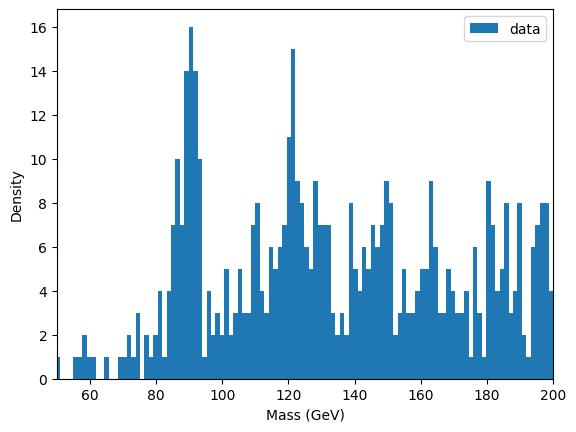

In [19]:
plt.hist(preproc_data["m4l_GeV"], bins=1000, label="data")
plt.xlim(50, 200)
plt.xlabel("Mass (GeV)")
plt.ylabel("Density")
plt.legend()